# Classification Methods using Telco-Customer-Churn Dataset

#### *WA_Fn-UseC_-Telco-Customer-Churn.csv* dataset

#  Evaluate the following classification models:
    a.       Logistic Regression
    b.       Support Vector Machine
    c.       K Nearest Neighbors
    d.       Decision Trees
    e.       Random Forests
Note that you need to decide the choice of hyper-parameters for the models, such as the value of k for k nearest neighbor method and the maximum depth for the random forest method.


The dataset and its description is available at Kaggle. The goal of this task is to analyze the behavior of telecom customers and understand what factors are important to retain customers.

### 1.       Visualize the univariate distribution of each input variable and the target variable “churn”.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

pd.set_option('max_columns',None)

In [2]:
telco = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

telco

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
telco.isnull().any()

customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool

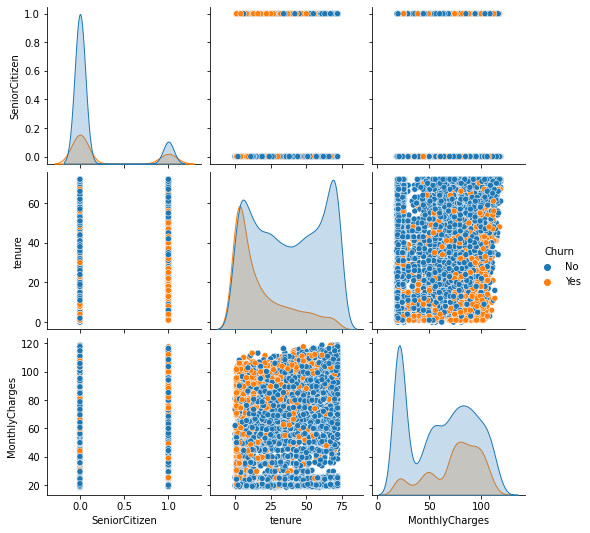

In [4]:
sns.pairplot(telco, hue='Churn')

<AxesSubplot:xlabel='gender', ylabel='count'>

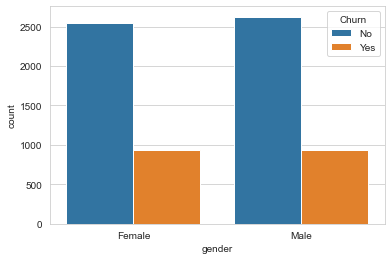

In [5]:
sns.set_style('whitegrid')
sns.countplot(x='gender',hue='Churn',data=telco)

<AxesSubplot:xlabel='SeniorCitizen', ylabel='count'>

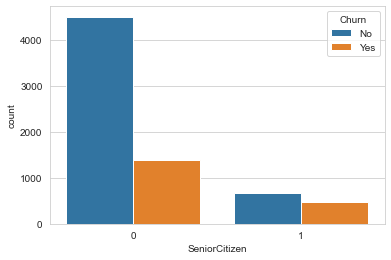

In [6]:
sns.countplot(x='SeniorCitizen',hue='Churn',data=telco)

<ipython-input-7-c4ad7382cc42>:4: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


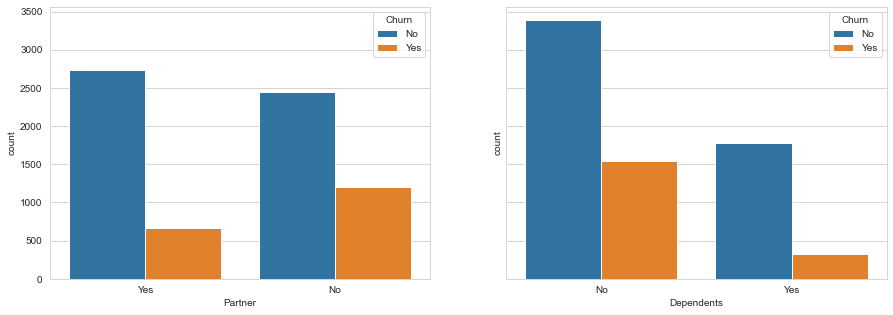

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
sns.countplot(x = 'Partner', ax=ax[0],data=telco, hue='Churn')
sns.countplot(x = 'Dependents', ax=ax[1], data=telco,hue='Churn')
fig.show()

(<Figure size 1080x360 with 1 Axes>,
 <AxesSubplot:xlabel='tenure', ylabel='count'>)

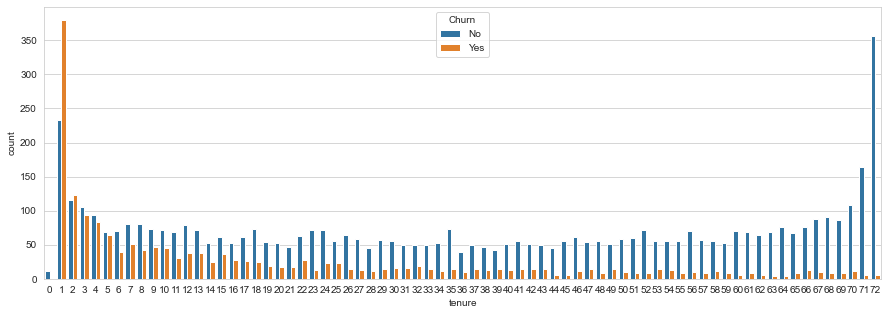

In [8]:
fig  =plt.subplots(figsize=(15, 5))
sns.set_style('whitegrid')
sns.countplot(x='tenure',hue='Churn',data=telco)
fig

<AxesSubplot:xlabel='PhoneService', ylabel='count'>

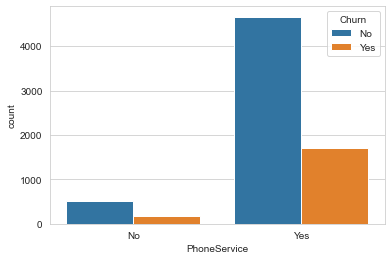

In [9]:
sns.countplot(x = 'PhoneService', data=telco, hue='Churn')

<AxesSubplot:xlabel='InternetService', ylabel='count'>

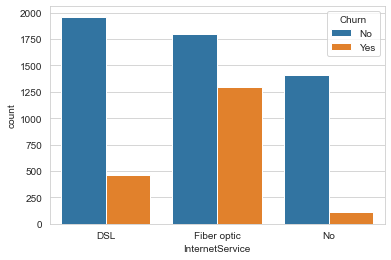

In [10]:
sns.countplot(x = 'InternetService',  data=telco,hue='Churn')

<AxesSubplot:xlabel='MultipleLines', ylabel='count'>

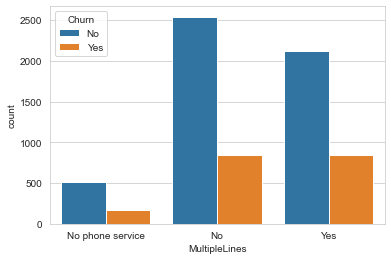

In [11]:
sns.set_style('whitegrid')
sns.countplot(x='MultipleLines',hue='Churn',data=telco)

<ipython-input-12-d86d206f54f4>:4: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


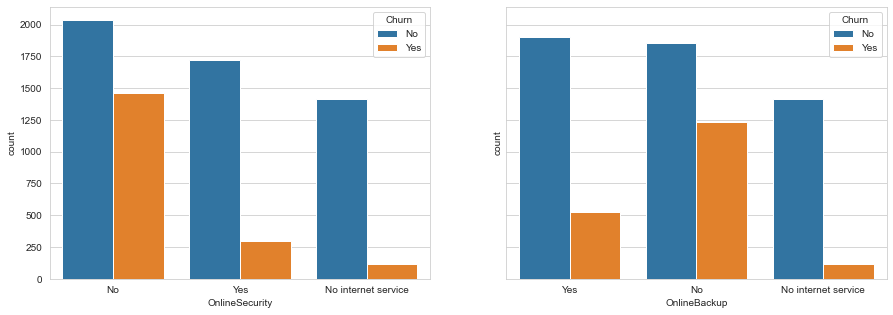

In [12]:
fig, ax =plt.subplots(1, 2, figsize=(15, 5), sharey=True)
sns.countplot(x = 'OnlineSecurity', ax=ax[0],data=telco, hue='Churn')
sns.countplot(x = 'OnlineBackup', ax=ax[1], data=telco,hue='Churn')
fig.show()

<ipython-input-13-f96821ad3fbf>:4: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


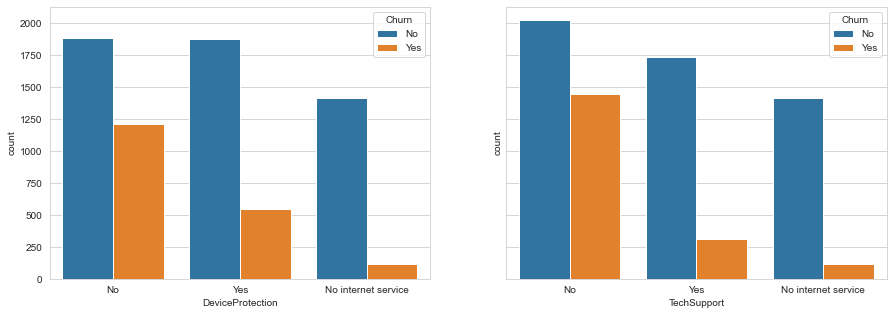

In [13]:
fig, ax =plt.subplots(1, 2, figsize=(15, 5), sharey=True)
sns.countplot(x = 'DeviceProtection', ax=ax[0],data=telco, hue='Churn')
sns.countplot(x = 'TechSupport', ax=ax[1], data=telco,hue='Churn')
fig.show()

<ipython-input-14-5c57b91c335f>:4: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


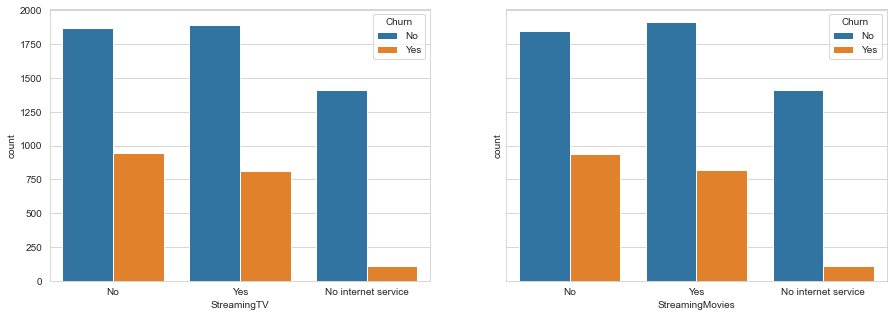

In [14]:
fig, ax =plt.subplots(1, 2, figsize=(15, 5), sharey=True)
sns.countplot(x = 'StreamingTV', ax=ax[0],data=telco, hue='Churn')
sns.countplot(x = 'StreamingMovies', ax=ax[1], data=telco,hue='Churn')
fig.show()

<AxesSubplot:xlabel='Contract', ylabel='count'>

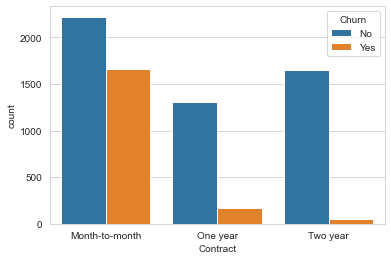

In [15]:
sns.countplot(x='Contract',hue='Churn',data=telco)

<AxesSubplot:xlabel='PaperlessBilling', ylabel='count'>

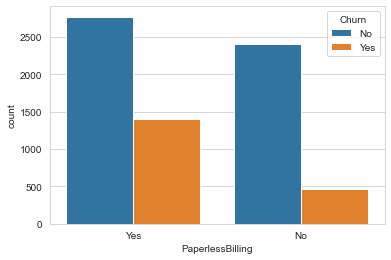

In [16]:
sns.countplot(x='PaperlessBilling',hue='Churn',data=telco)

(<Figure size 1080x360 with 1 Axes>,
 <AxesSubplot:xlabel='PaymentMethod', ylabel='count'>)

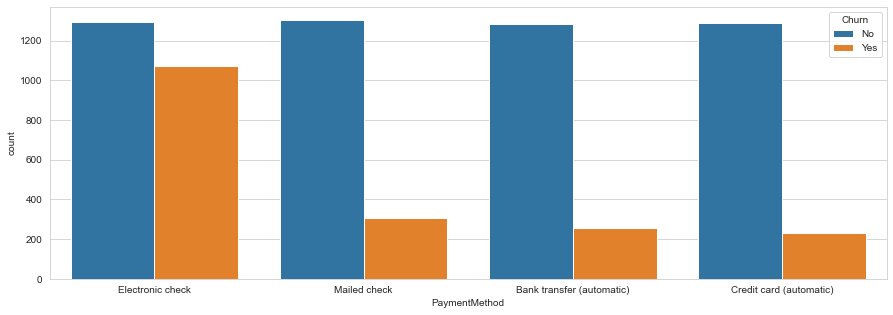

In [17]:
fig  =plt.subplots(figsize=(15, 5))
sns.countplot(x='PaymentMethod',hue='Churn',data=telco)
fig

(<Figure size 720x720 with 1 Axes>,
 <AxesSubplot:xlabel='tenure', ylabel='MonthlyCharges'>)

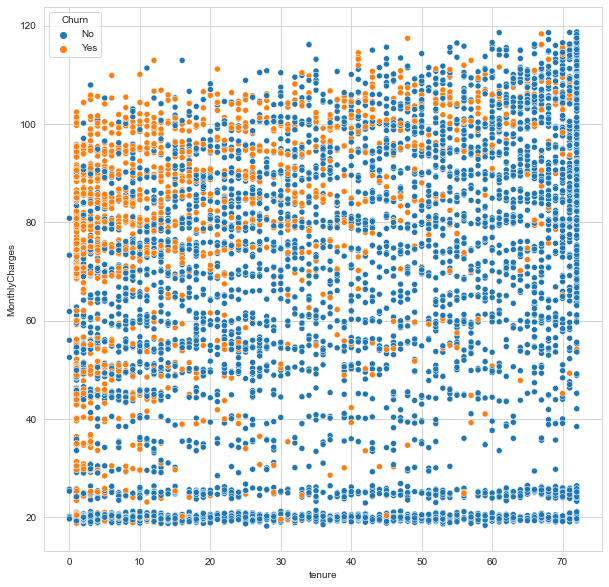

In [18]:
fig = plt.subplots(figsize=(10, 10))
sns.scatterplot(x = 'tenure', y='MonthlyCharges',data=telco, hue='Churn')
fig

(<Figure size 720x720 with 1 Axes>,
 <AxesSubplot:xlabel='tenure', ylabel='TotalCharges'>)

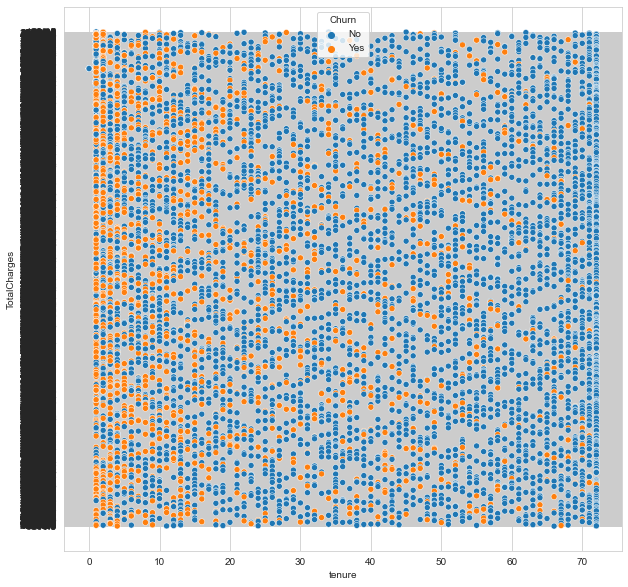

In [19]:
fig = plt.subplots(figsize=(10, 10))
sns.scatterplot(x = 'tenure', y='TotalCharges',data=telco, hue='Churn')
fig

### 2.       Split data into training and test sets. Convert each categorical variable into numerical variables using one-hot-encoding.

                Example of one-hot encoding:
                Gender: Male -> (1, 0), Female -> (0, 1)
                Ethnicity: 1. Caucasian, 2. African American, 3. Hispanic, 4. Asian, 5 Native American, 6 Pacific Islander
                One-hot encoded labels: 1 → (1, 0, 0, 0, 0, 0)
                                        2 → (0, 1, 0, 0, 0, 0)
                                        6 → (0, 0, 0, 0, 0, 1)


In [20]:
telco3 = pd.concat([pd.to_numeric(telco['TotalCharges'], errors='coerce').fillna(0), pd.get_dummies(telco.drop(['customerID', 'TotalCharges'], axis=1))], axis=1)

telco3

,TotalCharges,SeniorCitizen,tenure,MonthlyCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_No,Churn_Yes
0,29.85,0,1,29.85,1,0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0
1,1889.50,0,34,56.95,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,1,0
2,108.15,0,2,53.85,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1
3,1840.75,0,45,42.30,0,1,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0,1,0
4,151.65,0,2,70.70,1,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1990.50,0,24,84.80,0,1,0,1,0,1,0,1,0,0,1,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,1,0
7039,7362.90,0,72,103.20,1,0,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,1,0,0,1,0
7040,346.45,0,11,29.60,1,0,0,1,0,1,1,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0
7041,306.60,1,4,74.40,0,1,0,1,1,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1


In [21]:
telco3.isnull().any()

TotalCharges                               False
SeniorCitizen                              False
tenure                                     False
MonthlyCharges                             False
gender_Female                              False
gender_Male                                False
Partner_No                                 False
Partner_Yes                                False
Dependents_No                              False
Dependents_Yes                             False
PhoneService_No                            False
PhoneService_Yes                           False
MultipleLines_No                           False
MultipleLines_No phone service             False
MultipleLines_Yes                          False
InternetService_DSL                        False
InternetService_Fiber optic                False
InternetService_No                         False
OnlineSecurity_No                          False
OnlineSecurity_No internet service         False
OnlineSecurity_Yes  

In [22]:
telco3

,TotalCharges,SeniorCitizen,tenure,MonthlyCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_No,Churn_Yes
0,29.85,0,1,29.85,1,0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0
1,1889.50,0,34,56.95,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,1,0
2,108.15,0,2,53.85,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1
3,1840.75,0,45,42.30,0,1,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0,1,0
4,151.65,0,2,70.70,1,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1990.50,0,24,84.80,0,1,0,1,0,1,0,1,0,0,1,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,1,0
7039,7362.90,0,72,103.20,1,0,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,1,0,0,1,0
7040,346.45,0,11,29.60,1,0,0,1,0,1,1,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0
7041,306.60,1,4,74.40,0,1,0,1,1,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1


In [23]:
from sklearn.model_selection import train_test_split
telco_train, telco_test = train_test_split(telco3, test_size=0.2)

<AxesSubplot:>

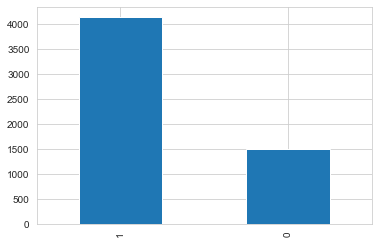

In [24]:
telco_train['Churn_No'].value_counts().plot.bar()

<AxesSubplot:>

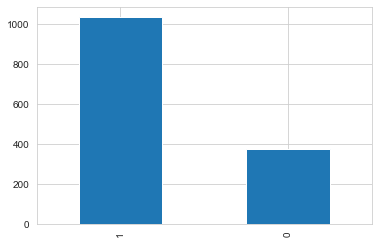

In [25]:
telco_test['Churn_No'].value_counts().plot.bar()

## a. Logistic Regression

In [68]:
telco_train = telco_train.apply(pd.to_numeric, errors='ignore')
telco_test = telco_test.apply(pd.to_numeric, errors='ignore')

In [64]:
# telco_train_rm = telco_train.drop(['Churn_Yes', 'Churn_No'], axis=1)
# telco_train_rm = telco_train_rm.apply(pd.to_numeric, errors='ignore')

# telco_test_rm = telco_test.drop(['Churn_Yes', 'Churn_No'], axis=1)
# telco_test_rm = telco_test_rm.apply(pd.to_numeric, errors='ignore')

In [69]:
# Increase max_iterr from default 100 to 300 to ConvergenceWarning error

from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=300)
model.fit(telco_train.drop(['Churn_Yes', 'Churn_No'], axis=1), telco_train['Churn_No'])

LogisticRegression(max_iter=300)

In [70]:
#Test Accuracy
from sklearn.metrics import accuracy_score

test_predictions = model.predict(telco_test.drop(['Churn_Yes', 'Churn_No'], axis=1))

accuracy_score(telco_test['Churn_No'], test_predictions)

0.8019872249822569

###     Logistic Regression: Cross Validation

In [71]:
#Cross Validation
from sklearn.model_selection import cross_val_score

print(cross_val_score(model, telco_train.drop(['Churn_Yes', 'Churn_No'], axis=1), telco_train['Churn_No'], cv=3))

[0.81043663 0.8056443  0.80351438]


In [72]:
#Confusion Matrix(True Positive,True Negative,False Positive, False Negative)
from sklearn.metrics import confusion_matrix

confusion_matrix(telco_test['Churn_No'], test_predictions)

array([[200, 174],
       [105, 930]], dtype=int64)

In [73]:
#Precision, Recall, F1 Classification Report
from sklearn.metrics import classification_report ,accuracy_score, precision_score, recall_score, f1_score

model_logreg = classification_report(telco_test['Churn_No'], test_predictions, output_dict=True)

print(classification_report(telco_test['Churn_No'], test_predictions))
print(accuracy_score(telco_test['Churn_No'], test_predictions))

              precision    recall  f1-score   support

           0       0.66      0.53      0.59       374
           1       0.84      0.90      0.87      1035

    accuracy                           0.80      1409
   macro avg       0.75      0.72      0.73      1409
weighted avg       0.79      0.80      0.80      1409

0.8019872249822569


### Logistic Regression Results:

In [74]:
print('Accuracy = ', model_logreg['accuracy'])
print('Precision = ', model_logreg['1']['precision'])
print('Recall = ', model_logreg['1']['recall'])
print('F1 Score = ', model_logreg['1']['f1-score'])

Accuracy =  0.8019872249822569
Precision =  0.842391304347826
Recall =  0.8985507246376812
F1 Score =  0.8695652173913043


## b. Support Vector Machine

### Support Vector Machine: Linear

In [83]:
from sklearn import svm
model = svm.SVC(kernel='linear', C=1)
model.fit(telco_train.drop(['Churn_Yes', 'Churn_No'], axis=1), telco_train['Churn_No'])

SVC(C=1, kernel='linear')

In [84]:
test_predictions = model.predict(telco_test.drop(['Churn_Yes', 'Churn_No'], axis=1))

In [85]:
accuracy_score(telco_test['Churn_No'], test_predictions)

0.7920511000709723

In [86]:
#Confusion Matrix(True Positive,True Negative,False Positive, False Negative)
from sklearn.metrics import confusion_matrix

confusion_matrix(telco_test['Churn_No'], test_predictions)

array([[160, 214],
       [ 79, 956]], dtype=int64)

In [87]:
print(classification_report(telco_test['Churn_No'], test_predictions))
print(accuracy_score(telco_test['Churn_No'], test_predictions))
model_svm_linear = classification_report(telco_test['Churn_No'], test_predictions, output_dict=True)

              precision    recall  f1-score   support

           0       0.67      0.43      0.52       374
           1       0.82      0.92      0.87      1035

    accuracy                           0.79      1409
   macro avg       0.74      0.68      0.69      1409
weighted avg       0.78      0.79      0.78      1409

0.7920511000709723


### Support Vector Machine: Radial Basis Function (RBF)

In [88]:
model = svm.SVC(kernel='rbf', C=1)
model.fit(telco_train.drop(['Churn_Yes', 'Churn_No'], axis=1), telco_train['Churn_No'])

SVC(C=1)

In [89]:
test_predictions = model.predict(telco_test.drop(['Churn_Yes', 'Churn_No'], axis=1))

In [90]:
#Confusion Matrix(True Positive,True Negative,False Positive, False Negative)
from sklearn.metrics import confusion_matrix

confusion_matrix(telco_test['Churn_No'], test_predictions)

array([[   0,  374],
       [   0, 1035]], dtype=int64)

In [91]:
print(classification_report(telco_test['Churn_No'], test_predictions))
print(accuracy_score(telco_test['Churn_No'], test_predictions))
model_svm_rbf = classification_report(telco_test['Churn_No'], test_predictions, output_dict=True)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       374
           1       0.73      1.00      0.85      1035

    accuracy                           0.73      1409
   macro avg       0.37      0.50      0.42      1409
weighted avg       0.54      0.73      0.62      1409

0.7345635202271115


d:\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Support Vector Machine Results:
#### Linear

In [92]:
print('Accuracy = ', model_svm_linear['accuracy'])
print('Precision = ', model_svm_linear['1']['precision'])
print('Recall = ', model_svm_linear['1']['recall'])
print('F1 Score = ', model_svm_linear['1']['f1-score'])

Accuracy =  0.7920511000709723
Precision =  0.8170940170940171
Recall =  0.923671497584541
F1 Score =  0.8671201814058958


#### RBF

In [93]:
print('Accuracy = ', model_svm_rbf['accuracy'])
print('Precision = ', model_svm_rbf['1']['precision'])
print('Recall = ', model_svm_rbf['1']['recall'])
print('F1 Score = ', model_svm_rbf['1']['f1-score'])

Accuracy =  0.7345635202271115
Precision =  0.7345635202271115
Recall =  1.0
F1 Score =  0.8469721767594108


## c. K Nearest Neighbor

## K = 1

In [94]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=1)
model.fit(telco_train.drop(['Churn_Yes', 'Churn_No'], axis=1), telco_train['Churn_No'])
test_predictions = model.predict(telco_test.drop(['Churn_Yes', 'Churn_No'], axis=1))

KNeighborsClassifier(n_neighbors=1)

In [96]:
print("K Nearest Neighbors: K=1")
print(classification_report(telco_test['Churn_No'], test_predictions))
print(accuracy_score(telco_test['Churn_No'], test_predictions))

model_knn1 = classification_report(telco_test['Churn_No'], test_predictions, output_dict=True)

K Nearest Neighbors: K=1
              precision    recall  f1-score   support

           0       0.46      0.50      0.48       374
           1       0.81      0.79      0.80      1035

    accuracy                           0.71      1409
   macro avg       0.64      0.64      0.64      1409
weighted avg       0.72      0.71      0.72      1409

0.7139815471965933


## K = 5

In [97]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(telco_train.drop(['Churn_Yes', 'Churn_No'], axis=1), telco_train['Churn_No'])
test_predictions = model.predict(telco_test.drop(['Churn_Yes', 'Churn_No'], axis=1))

KNeighborsClassifier()

In [99]:
print("K Nearest Neighbors: K=5")
print(classification_report(telco_test['Churn_No'], test_predictions))
print(accuracy_score(telco_test['Churn_No'], test_predictions))

model_knn5 = classification_report(telco_test['Churn_No'], test_predictions, output_dict=True)

K Nearest Neighbors: K=5
              precision    recall  f1-score   support

           0       0.56      0.44      0.49       374
           1       0.81      0.87      0.84      1035

    accuracy                           0.76      1409
   macro avg       0.68      0.66      0.67      1409
weighted avg       0.74      0.76      0.75      1409

0.758694109297374


## K = 25

In [100]:
model = KNeighborsClassifier(n_neighbors=25)
model.fit(telco_train.drop(['Churn_Yes', 'Churn_No'], axis=1), telco_train['Churn_No'])
test_predictions = model.predict(telco_test.drop(['Churn_Yes', 'Churn_No'], axis=1))

KNeighborsClassifier(n_neighbors=25)

In [102]:
print("K Nearest Neighbors: K=25")
print(classification_report(telco_test['Churn_No'], test_predictions))
print(accuracy_score(telco_test['Churn_No'], test_predictions))

model_knn25 = classification_report(telco_test['Churn_No'], test_predictions, output_dict=True)

K Nearest Neighbors: K=25
              precision    recall  f1-score   support

           0       0.65      0.37      0.48       374
           1       0.80      0.93      0.86      1035

    accuracy                           0.78      1409
   macro avg       0.73      0.65      0.67      1409
weighted avg       0.76      0.78      0.76      1409

0.7814052519517388


### K Nearest Neighbor Results:
#### K=1

In [103]:
print('Accuracy = ', model_knn1['accuracy'])
print('Precision = ', model_knn1['1']['precision'])
print('Recall = ', model_knn1['1']['recall'])
print('F1 Score = ', model_knn1['1']['f1-score'])

Accuracy =  0.7139815471965933
Precision =  0.8134920634920635
Recall =  0.7922705314009661
F1 Score =  0.8027410670582477


#### K=5

In [104]:
print('Accuracy = ', model_knn5['accuracy'])
print('Precision = ', model_knn5['1']['precision'])
print('Recall = ', model_knn5['1']['recall'])
print('F1 Score = ', model_knn5['1']['f1-score'])

Accuracy =  0.758694109297374
Precision =  0.8116591928251121
Recall =  0.8743961352657005
F1 Score =  0.841860465116279


#### K=25

In [105]:
print('Accuracy = ', model_knn25['accuracy'])
print('Precision = ', model_knn25['1']['precision'])
print('Recall = ', model_knn25['1']['recall'])
print('F1 Score = ', model_knn25['1']['f1-score'])

Accuracy =  0.7814052519517388
Precision =  0.80418410041841
Recall =  0.9285024154589372
F1 Score =  0.8618834080717488


## d. Decision Trees

### Max Depth = 2

In [120]:
from sklearn.tree import DecisionTreeClassifier

In [121]:
model = DecisionTreeClassifier(max_depth=2, random_state=30)
model.fit(telco_train.drop(['Churn_Yes', 'Churn_No'], axis=1), telco_train['Churn_No'])
test_predictions = model.predict(telco_test.drop(['Churn_Yes', 'Churn_No'], axis=1))

In [122]:
print("Decision Tree: Depth = 2")
print(confusion_matrix(telco_test['Churn_No'], test_predictions))
print(classification_report(telco_test['Churn_No'], test_predictions))
print(accuracy_score(telco_test['Churn_No'], test_predictions))

model_dtree2 = classification_report(telco_test['Churn_No'], test_predictions, output_dict=True)

Decision Tree: Depth = 2
[[223 151]
 [204 831]]
              precision    recall  f1-score   support

           0       0.52      0.60      0.56       374
           1       0.85      0.80      0.82      1035

    accuracy                           0.75      1409
   macro avg       0.68      0.70      0.69      1409
weighted avg       0.76      0.75      0.75      1409

0.7480482611781405


### Max Depth =  4

In [123]:
model = DecisionTreeClassifier(max_depth=4, random_state=30)
model.fit(telco_train.drop(['Churn_Yes', 'Churn_No'], axis=1), telco_train['Churn_No'])
test_predictions = model.predict(telco_test.drop(['Churn_Yes', 'Churn_No'], axis=1))

In [124]:
print("Decision Tree: Depth = 4")
print(confusion_matrix(telco_test['Churn_No'], test_predictions))
print(classification_report(telco_test['Churn_No'], test_predictions))
print(accuracy_score(telco_test['Churn_No'], test_predictions))

model_dtree4 = classification_report(telco_test['Churn_No'], test_predictions, output_dict=True)

Decision Tree: Depth = 4
[[161 213]
 [ 86 949]]
              precision    recall  f1-score   support

           0       0.65      0.43      0.52       374
           1       0.82      0.92      0.86      1035

    accuracy                           0.79      1409
   macro avg       0.73      0.67      0.69      1409
weighted avg       0.77      0.79      0.77      1409

0.7877927608232789


### Max Depth = 5

In [125]:
model = DecisionTreeClassifier(max_depth=5, random_state=30)
model.fit(telco_train.drop(['Churn_Yes', 'Churn_No'], axis=1), telco_train['Churn_No'])
test_predictions = model.predict(telco_test.drop(['Churn_Yes', 'Churn_No'], axis=1))

In [126]:
print("Decision Tree: Depth = 5")
print(confusion_matrix(telco_test['Churn_No'], test_predictions))
print(classification_report(telco_test['Churn_No'], test_predictions))
print(accuracy_score(telco_test['Churn_No'], test_predictions))

model_dtree5 = classification_report(telco_test['Churn_No'], test_predictions, output_dict=True)

Decision Tree: Depth = 5
[[195 179]
 [124 911]]
              precision    recall  f1-score   support

           0       0.61      0.52      0.56       374
           1       0.84      0.88      0.86      1035

    accuracy                           0.78      1409
   macro avg       0.72      0.70      0.71      1409
weighted avg       0.78      0.78      0.78      1409

0.7849538679914834


#### Visual Decision Tree: Max Depth = 5

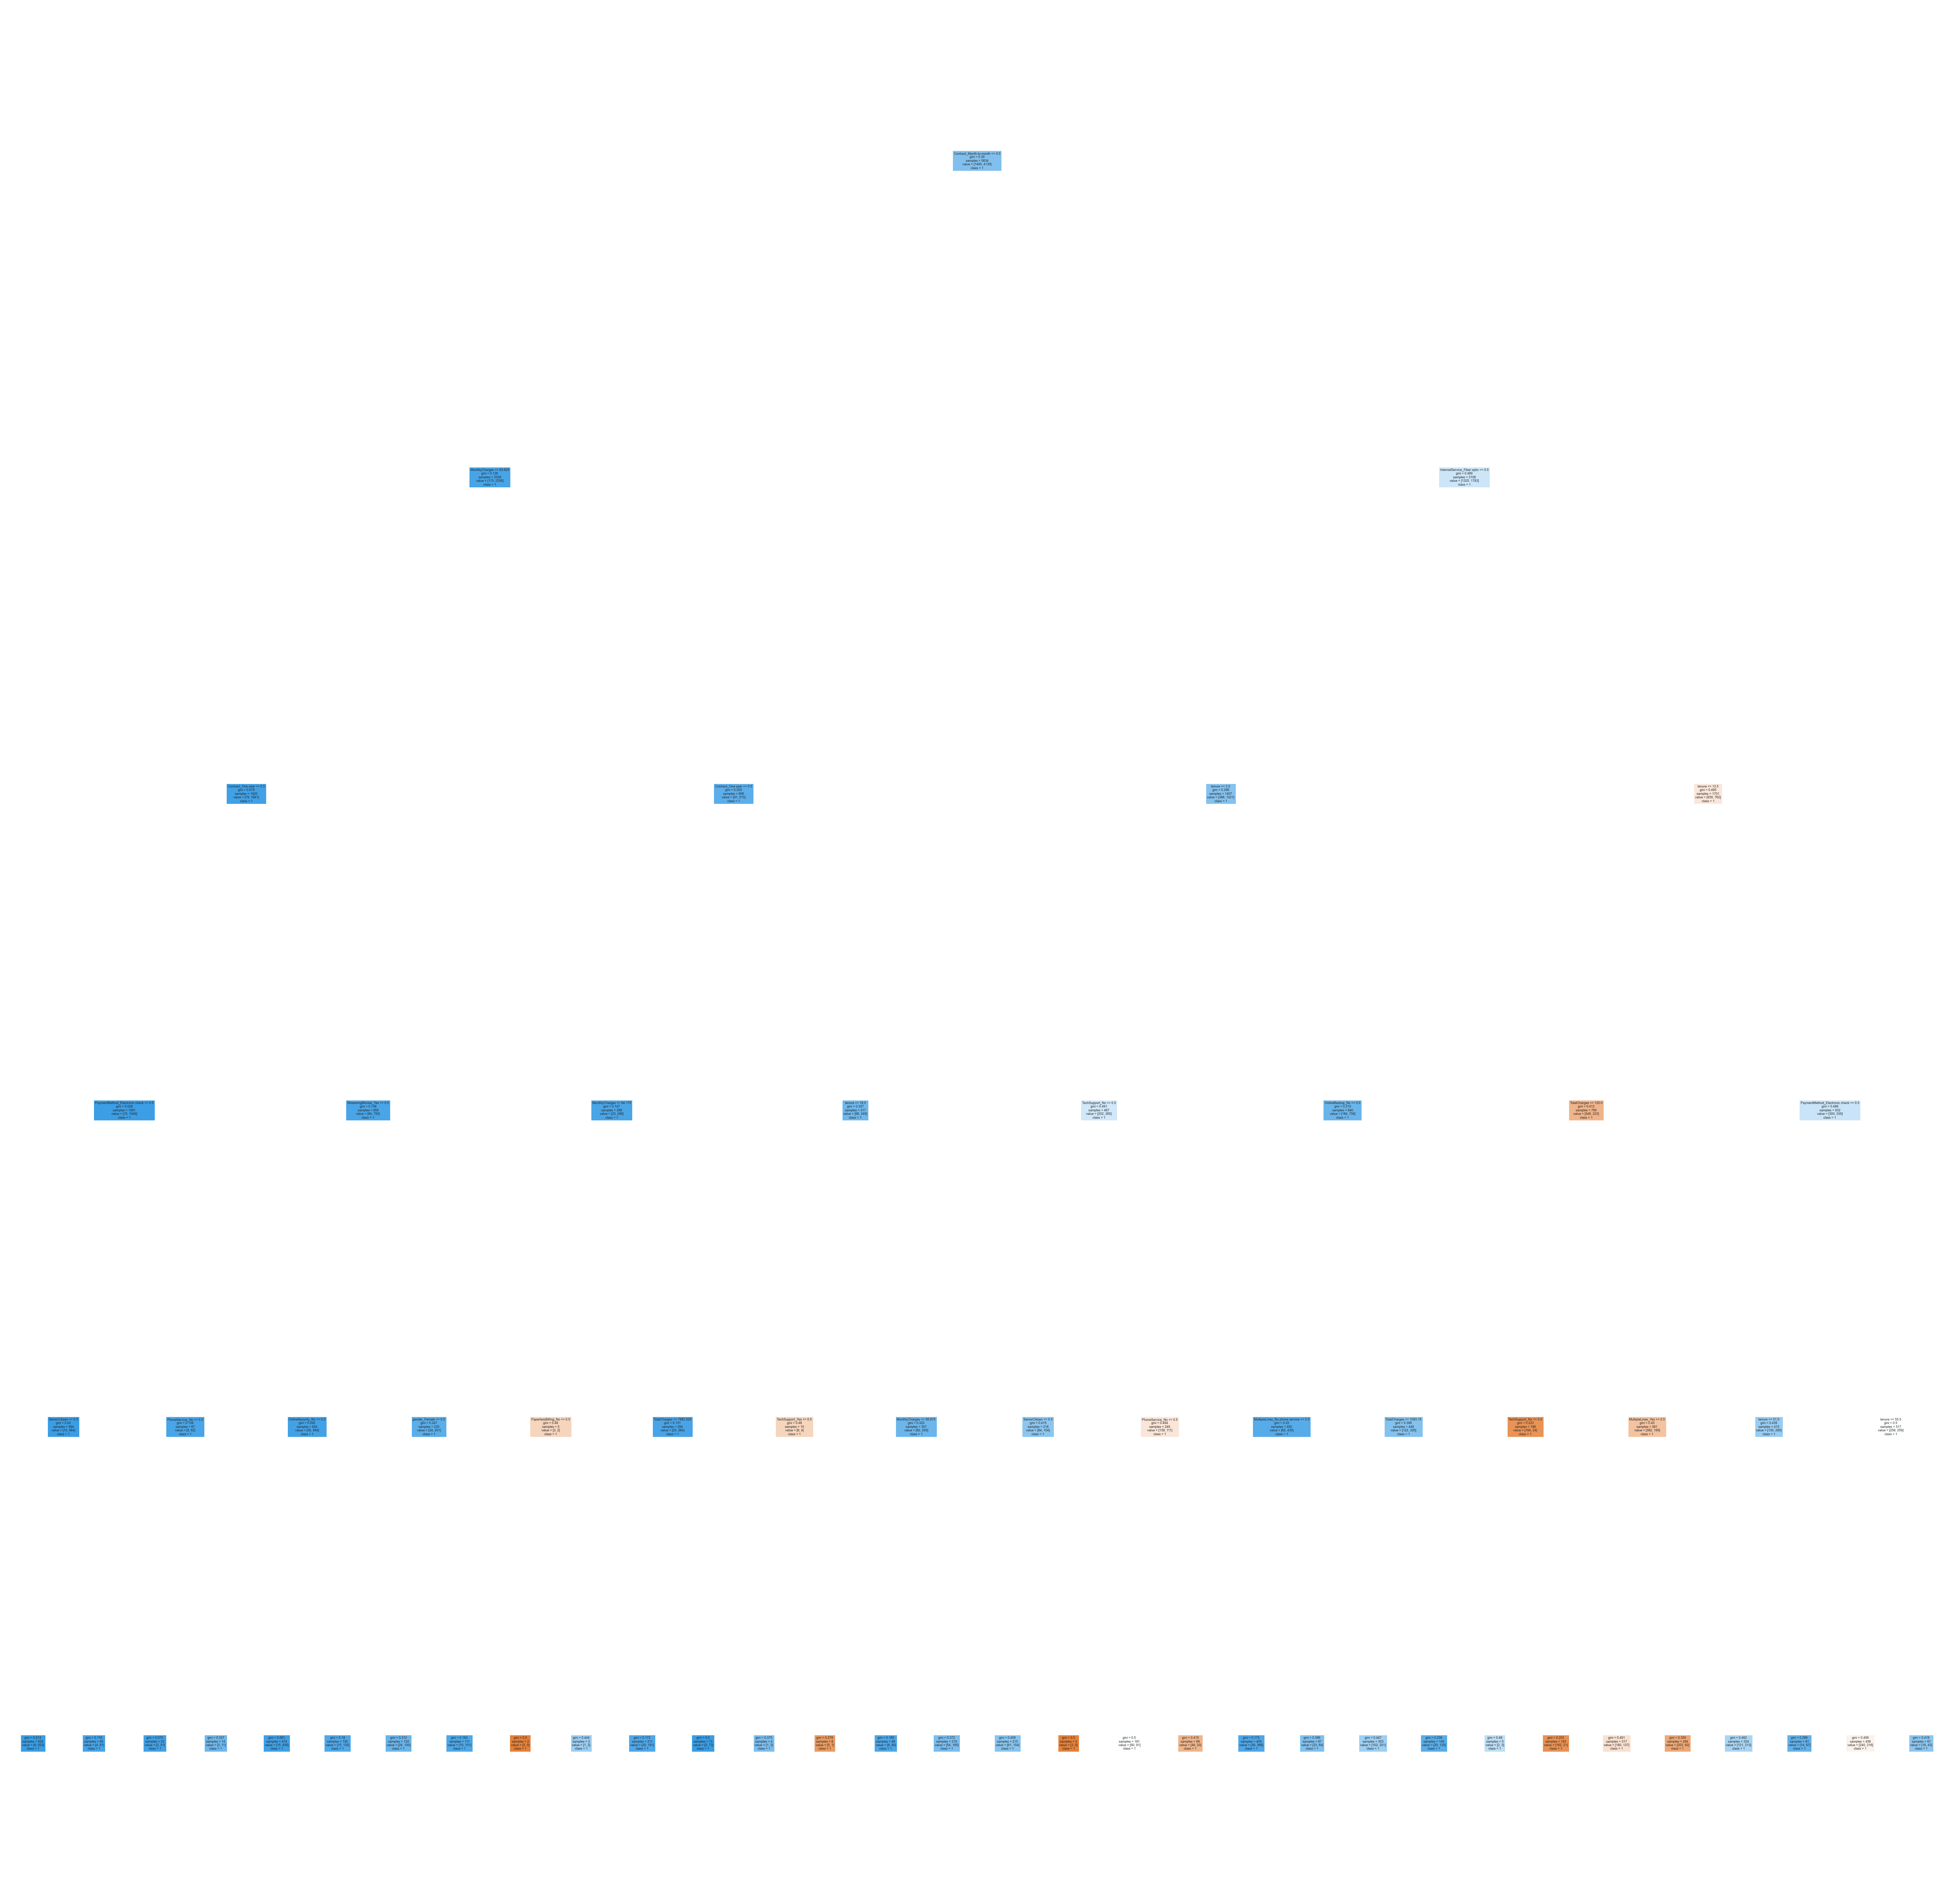

In [127]:
from sklearn.tree import plot_tree

plt.figure(figsize=(100,100))
plot_tree(model, feature_names = telco_test.columns, filled=True, class_names = telco3.Churn_No.astype(str))
plt.show()

### Decision Tree Results:
#### Max Depth = 2

In [128]:
print('Accuracy = ', model_dtree2['accuracy'])
print('Precision = ', model_dtree2['1']['precision'])
print('Recall = ', model_dtree2['1']['recall'])
print('F1 Score = ', model_dtree2['1']['f1-score'])

Accuracy =  0.7480482611781405
Precision =  0.8462321792260692
Recall =  0.8028985507246377
F1 Score =  0.8239960337134358


#### Max Depth = 4

In [129]:
print('Accuracy = ', model_dtree4['accuracy'])
print('Precision = ', model_dtree4['1']['precision'])
print('Recall = ', model_dtree4['1']['recall'])
print('F1 Score = ', model_dtree4['1']['f1-score'])

Accuracy =  0.7877927608232789
Precision =  0.8166953528399311
Recall =  0.9169082125603865
F1 Score =  0.8639053254437868



#### Max Depth = 5

In [130]:
print('Accuracy = ', model_dtree5['accuracy'])
print('Precision = ', model_dtree5['1']['precision'])
print('Recall = ', model_dtree5['1']['recall'])
print('F1 Score = ', model_dtree5['1']['f1-score'])

Accuracy =  0.7849538679914834
Precision =  0.8357798165137614
Recall =  0.8801932367149758
F1 Score =  0.8574117647058823


## e. Random Forest

In [134]:
from sklearn.ensemble import RandomForestClassifier

### Max Depth = 2

In [137]:
model = RandomForestClassifier(n_estimators=100, max_depth=2)
model.fit(telco_train.drop(['Churn_Yes', 'Churn_No'], axis=1), telco_train['Churn_No'])
test_predictions = model.predict(telco_test.drop(['Churn_Yes', 'Churn_No'], axis=1))

In [138]:
print("Random Forest: Depth = 2")
print(confusion_matrix(telco_test['Churn_No'], test_predictions))
print(classification_report(telco_test['Churn_No'], test_predictions))
print(accuracy_score(telco_test['Churn_No'], test_predictions))

model_rfor2 = classification_report(telco_test['Churn_No'], test_predictions, output_dict=True)

Random Forest: Depth = 2
[[  17  357]
 [   3 1032]]
              precision    recall  f1-score   support

           0       0.85      0.05      0.09       374
           1       0.74      1.00      0.85      1035

    accuracy                           0.74      1409
   macro avg       0.80      0.52      0.47      1409
weighted avg       0.77      0.74      0.65      1409

0.7444996451383961


### Max Depth = 5

In [139]:
model = RandomForestClassifier(n_estimators=100, max_depth=5)
model.fit(telco_train.drop(['Churn_Yes', 'Churn_No'], axis=1), telco_train['Churn_No'])
test_predictions = model.predict(telco_test.drop(['Churn_Yes', 'Churn_No'], axis=1))

In [140]:
print("Random Forest: Depth = 5")
print(confusion_matrix(telco_test['Churn_No'], test_predictions))
print(classification_report(telco_test['Churn_No'], test_predictions))
print(accuracy_score(telco_test['Churn_No'], test_predictions))

model_rfor5 = classification_report(telco_test['Churn_No'], test_predictions, output_dict=True)

Random Forest: Depth = 5
[[147 227]
 [ 73 962]]
              precision    recall  f1-score   support

           0       0.67      0.39      0.49       374
           1       0.81      0.93      0.87      1035

    accuracy                           0.79      1409
   macro avg       0.74      0.66      0.68      1409
weighted avg       0.77      0.79      0.77      1409

0.78708303761533


### Max Depth = 10

In [141]:
model = RandomForestClassifier(n_estimators=100, max_depth=10)
model.fit(telco_train.drop(['Churn_Yes', 'Churn_No'], axis=1), telco_train['Churn_No'])
test_predictions = model.predict(telco_test.drop(['Churn_Yes', 'Churn_No'], axis=1))

In [142]:
print("Random Forest: Depth = 10")
print(confusion_matrix(telco_test['Churn_No'], test_predictions))
print(classification_report(telco_test['Churn_No'], test_predictions))
print(accuracy_score(telco_test['Churn_No'], test_predictions))

model_rfor10 = classification_report(telco_test['Churn_No'], test_predictions, output_dict=True)

Random Forest: Depth = 10
[[179 195]
 [ 92 943]]
              precision    recall  f1-score   support

           0       0.66      0.48      0.56       374
           1       0.83      0.91      0.87      1035

    accuracy                           0.80      1409
   macro avg       0.74      0.69      0.71      1409
weighted avg       0.78      0.80      0.78      1409

0.7963094393186657


### Random Forest Results:
#### Max Depth = 2

In [143]:
print('Accuracy = ', model_rfor2['accuracy'])
print('Precision = ', model_rfor2['1']['precision'])
print('Recall = ', model_rfor2['1']['recall'])
print('F1 Score = ', model_rfor2['1']['f1-score'])

Accuracy =  0.7444996451383961
Precision =  0.7429805615550756
Recall =  0.9971014492753624
F1 Score =  0.8514851485148515


#### Max Depth = 5

In [144]:
print('Accuracy = ', model_rfor5['accuracy'])
print('Precision = ', model_rfor5['1']['precision'])
print('Recall = ', model_rfor5['1']['recall'])
print('F1 Score = ', model_rfor5['1']['f1-score'])

Accuracy =  0.78708303761533
Precision =  0.8090832632464255
Recall =  0.9294685990338164
F1 Score =  0.8651079136690647


#### Max Depth = 10

In [145]:
print('Accuracy = ', model_rfor10['accuracy'])
print('Precision = ', model_rfor10['1']['precision'])
print('Recall = ', model_rfor10['1']['recall'])
print('F1 Score = ', model_rfor10['1']['f1-score'])

Accuracy =  0.7963094393186657
Precision =  0.828646748681898
Recall =  0.9111111111111111
F1 Score =  0.8679245283018867


### 4.       Choose the best model by analyzing the accuracy, precision, recall, and F-1 score.

In [228]:
results = pd.DataFrame(columns= ['Model Name', \
                                 'Accuracy', \
                                *[i for i in list(model_logreg['1'].keys())]])

In [229]:
results

,Model Name,Accuracy,precision,recall,f1-score,support


In [230]:
results.loc['0'] = ['Log Reg', \
                        model_logreg['accuracy'], \
                        *model_logreg['1'].values()]

results.loc['1'] = ['SVM Lin', \
                    model_svm_linear['accuracy'], \
                    *model_svm_linear['1'].values()]

results.loc['2'] = ['SVM RBF', \
                    model_svm_rbf['accuracy'], \
                    *model_svm_rbf['1'].values()]

results.loc['3'] = ['KNN 1', \
                    model_knn1['accuracy'], \
                    *model_knn1['1'].values()]

results.loc['4'] = ['KNN 5', \
                    model_knn5['accuracy'], \
                    *model_knn5['1'].values()]

results.loc['5'] = ['KNN 25', \
                    model_knn25['accuracy'], \
                    *model_knn25['1'].values()]

results.loc['6'] = ['Dec Tree 2', \
                    model_dtree2['accuracy'], \
                    *model_dtree2['1'].values()]

results.loc['7'] = ['Dec Tree 4', \
                    model_dtree4['accuracy'], \
                    *model_dtree4['1'].values()]

results.loc['8'] = ['Dec Tree 5', \
                    model_dtree5['accuracy'], \
                    *model_dtree5['1'].values()]

results.loc['9'] = ['Rand Forest 2', \
                    model_rfor2['accuracy'], \
                    *model_rfor2['1'].values()]

results.loc['10'] = ['Rand Forest 5', \
                    model_rfor5['accuracy'], \
                    *model_rfor5['1'].values()]

results.loc['11'] = ['Rand Forest 10', \
                    model_rfor10['accuracy'], \
                    *model_rfor10['1'].values()]

In [231]:
results

,Model Name,Accuracy,precision,recall,f1-score,support
0,Log Reg,0.801987,0.842391,0.898551,0.869565,1035
1,SVM Lin,0.792051,0.817094,0.923671,0.867120,1035
2,SVM RBF,0.734564,0.734564,1.000000,0.846972,1035
3,KNN 1,0.713982,0.813492,0.792271,0.802741,1035
4,KNN 5,0.758694,0.811659,0.874396,0.841860,1035
5,KNN 25,0.781405,0.804184,0.928502,0.861883,1035
6,Dec Tree 2,0.748048,0.846232,0.802899,0.823996,1035
7,Dec Tree 4,0.745919,0.744052,0.997101,0.852188,1035
8,Dec Tree 5,0.784954,0.835780,0.880193,0.857412,1035
9,Rand Forest 2,0.744500,0.742981,0.997101,0.851485,1035


By analyzing the accuracy precision, recall, and F-1 Scores of the models and their hyperparameters, the best model for analyzing the telco dataset for customer churn is:

**Logistic Regression Model:**

In [232]:
print('Accuracy = ', model_logreg['accuracy'])
print('Precision = ', model_logreg['1']['precision'])
print('Recall = ', model_logreg['1']['recall'])
print('F1 Score = ', model_logreg['1']['f1-score'])

Accuracy =  0.8019872249822569
Precision =  0.842391304347826
Recall =  0.8985507246376812
F1 Score =  0.8695652173913043


### 5.       Which types of customers are less likely to end the service? 

Customers less likely to end service and stay are:
- Customers who are senior citizens
- Customers with long tenure
- Customers with dependents
- Customers who are under a two-year contract